# Logging limitation

The *resc* logging system is based on sending a *logsample* at each time instant, the definition is in ```logger.h```

```c

#define log_nr_signals 10

typedef struct log_sample{
	uint32_t tic;
	float signals[log_nr_signals];
} LogSample;
```

This logging can run at different sample intervals, but due to the fixed baudrate there is a limit on either the no of signals or sample intervall.

This notebook will try to summarize this.

* $b_L$ - bytes per *logsample*
* $n_L$ - no of logged floats
* $T$ - Time to transmit a single *logsample*
* $r$ - Baudrate

$$
b_L = 4 (n_L + 1) 
$$
$$
T = \dfrac{b_L}{\frac{r}{8}} = \frac{32(n_L + 1) }{r}
$$


Text(0, 0.5, 'Min Sample intervall [ms]')

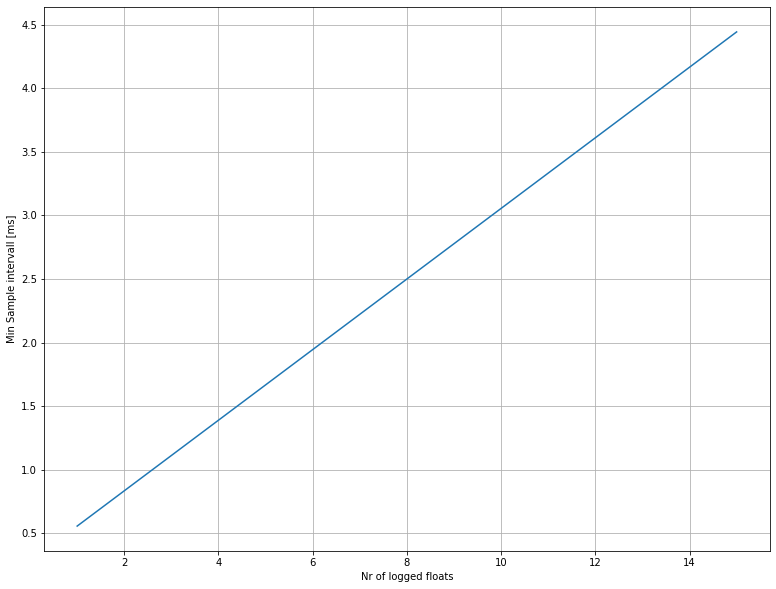

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 

baudrate = 115200

nL = np.linspace(1,15)

T = 32*(nL + 1)/baudrate
T = T  * 1e3

plt.figure(figsize=(13,10))
plt.plot(nL,T)
plt.grid('on')
plt.xlabel('Nr of logged floats')
plt.ylabel('Min Sample intervall [ms]')



Before creating this graph I went with the more *trial and error* approach, and found that for a sample intervall of 4ms, the limit is 11 floats. So with some extra margin, it should give a good idea of what kind of logging capabilites to expect.

A simple solution would be to achive a higher bandwidth, then the following would be possible.

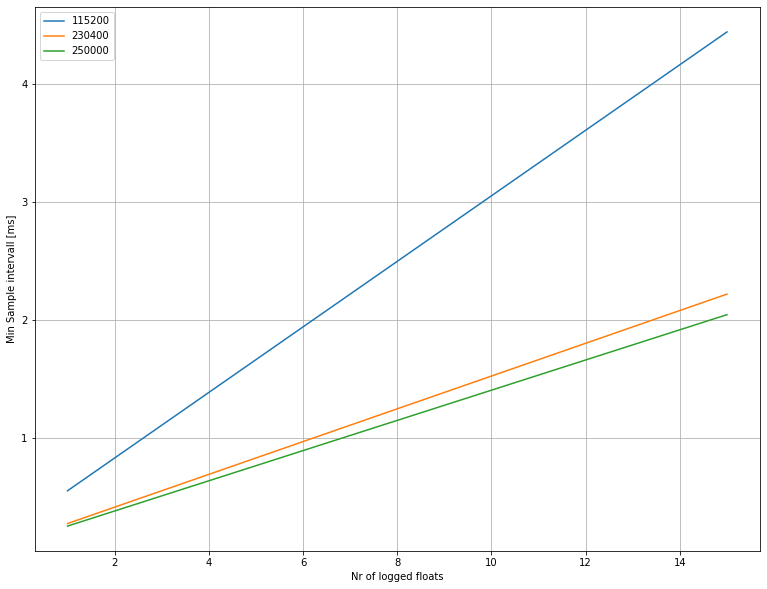

In [9]:
baudrates = [115200,230400,250000]
plt.figure(figsize=(13,10))
for baudrate in baudrates:
    nL = np.linspace(1,15)

    T = 32*(nL + 1)/baudrate
    T = T  * 1e3

    
    plt.plot(nL,T,label=str(baudrate))
plt.grid('on')
plt.xlabel('Nr of logged floats')
plt.ylabel('Min Sample intervall [ms]')
plt.legend()
